# Expectation Maximization Algorithms

Expectation-Maximization (EM) Algorithms are very powerful technique to obtain maximum likelihood estimates in situations where it is difficult to maximize the likelihood directly. 

This is especially common for latent variable models, which can have very complicated likelihood functions. The canonical example are mixture models, in which the data is assumed to have been produced by two or more processes with different probability distributions. In that case, the likelihood combines the probability distributions of the processes with the probability of a data point having been sampled from a particular process.

The EM Algorithm performs gradient-free coordinate ascent by iterating between an "expectation" and a "maximization" step. Similar to gradient descent, it can be modified to scale to very large datasets by stochastic approximation, producing stochastic EM. Similar to gradient descent, it can be shown that EM is guaranteed to maximize the likelihood, but there is no guaranty that the maximum is global. 

There is a large body of work that optimizes and adapts EM algorithms to a variety of situations. The most important applications of "plain vanilla" EM are latent variable models in which the conditional probability of the latent parameters is tractable. 


## References

### My favorite references: 

Textbook (in context of maximum likelihood inference):
    Wasserman, "All of Statistics" (2003), page 143

Blog Post (NVIDIA) (best insight in theory; explains variational EM):
    https://chrischoy.github.io/research/Expectation-Maximization-and-Variational-Inference/
    
    
Blog Post (very simple python implementation):
    https://www.python-course.eu/expectation_maximization_and_gaussian_mixture_models.php

### Video Lectures
Andrew Ng Lecture (1:20hrs)
    https://www.youtube.com/watch?v=rVfZHWTwXSA


Much shorter Introductory Video Lecture (17 mins)
    https://www.youtube.com/watch?v=qMTuMa86NzU


### Blog Post
Application to Image Processing
    https://towardsdatascience.com/solving-a-chicken-and-egg-problem-expectation-maximization-em-c717547c3be2

Gaussian Mixture Models
    https://towardsdatascience.com/latent-variables-expectation-maximization-algorithm-fb15c4e0f32c
    


## Implementation

Implements a Gaussian Mixture Model that is fitted through the EM Algorithm.

Based on https://www.python-course.eu/expectation_maximization_and_gaussian_mixture_models.php

[array([[31.91073945]]), array([[28.84145497]])]
[-13.05532664  10.7630879 ]


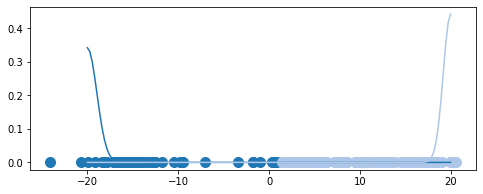

[array([[170.45150352]]), array([[154.76123936]])]
[-1.18712331  3.08232226]


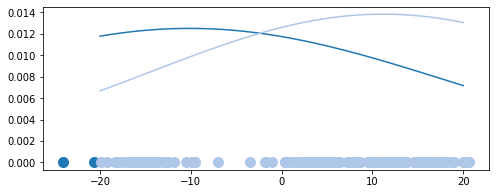

[array([[164.68507595]]), array([[164.51210467]])]
[1.53435078 1.56293975]


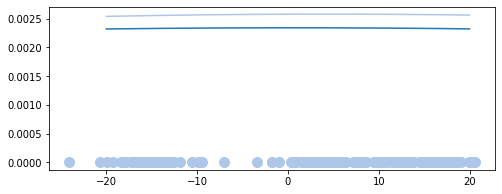

[array([[164.57139807]]), array([[164.56999706]])]
[1.55319033 1.55339095]


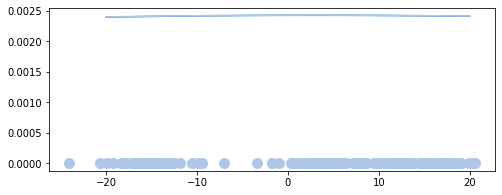

[array([[164.570475]]), array([[164.57046444]])]
[1.55332256 1.553324  ]


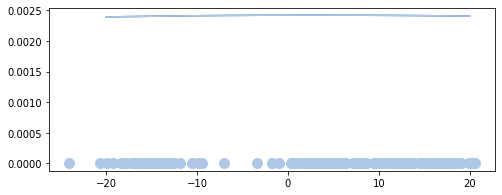

[array([[164.57046804]]), array([[164.57046796]])]
[1.55332351 1.55332352]


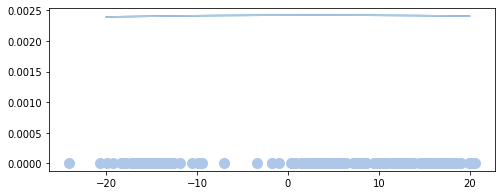

[array([[164.57046799]]), array([[164.57046799]])]
[1.55332352 1.55332352]


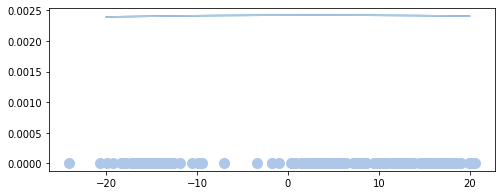

[array([[164.57046799]]), array([[164.57046799]])]
[1.55332352 1.55332352]


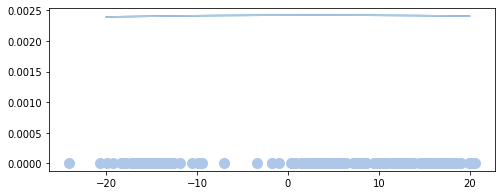

[array([[164.57046799]]), array([[164.57046799]])]
[1.55332352 1.55332352]


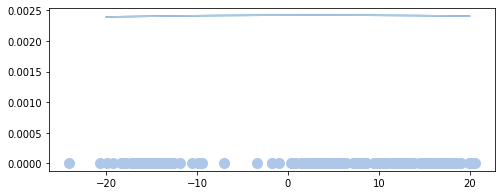

[array([[164.57046799]]), array([[164.57046799]])]
[1.55332352 1.55332352]


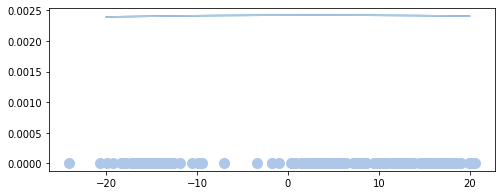

In [44]:
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

import numpy as np
from scipy.stats import norm
np.random.seed(0)

# These are the "Tableau 20" colors as RGB.    
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)  



class GM1D:
    """
    Implements a one-dimensional Gaussian Mixture Model
    """

    def __init__(self,n_clusters=3):

        self.n_clusters = n_clusters  

    def fit(self, X, iterations, make_plots=True):
        
        self.iterations = iterations
        self.X = X
        

        """
        0. Instantiate the random mu, pi and var
        """
        self.mu = np.linspace(min(X),max(X),self.n_clusters) #*np.random.randn(1,3)[0] #[-8,8,5]
        self.pi = [1/self.n_clusters for i in range(self.n_clusters)]
        self.var = np.abs(np.random.randn(1,self.n_clusters))[0] #[5,3,1]
    
        
        for iter in range(self.iterations):
            
            """
            E-Step
            """

            """
            Calculate the 'responsibility' r
            """
            r = np.zeros((len(self.X),self.n_clusters))  


            # numerator
            for c,gaussian,p_c in zip(
                range(self.n_clusters),
                [norm(loc=self.mu[j],scale=self.var[j]) for j in range(self.n_clusters)],
                self.pi
            ):
                
                r[:,c] = p_c*gaussian.pdf(self.X) 
                
                
            # denominator (normalization) 
            for i in range(len(r)):
                r[i] = r[i]/(np.sum(self.pi)*np.sum(r,axis=1)[i])


            """Plot the data"""

            fig = plt.figure(figsize=(8,3))
            ax0 = fig.add_subplot(111)


            for i in range(len(r)):
                resp = [r[i][k] for k in range(self.n_clusters)]
                color = tableau20[resp.index(max(resp))]
                ax0.scatter(self.X[i],0,c=color,s=100) 


            """Plot the gaussians"""
            
            if make_plots:

                for gaussian,color in zip(
                    [norm(loc=self.mu[j],scale=self.var[j]).pdf(np.linspace(min(self.X),max(self.X),num=150)) for j in range(self.n_clusters)],
                    tableau20):
                    ax0.plot(np.linspace(-20,20,num=150),gaussian,color=color)
            
            
            
            """M-Step"""
    

            """update p_c"""
            m_c = []
            for c in range(len(r[0])):
                m = np.sum(r[:,c])
                m_c.append(m) # For each cluster c, calculate the m_c and add it to the list m_c

            for k in range(len(m_c)):
                self.pi[k] = (m_c[k]/np.sum(m_c)) # For each cluster c, calculate the fraction of points pi_c which belongs to cluster c

            """update mu_c"""
            self.mu = np.sum(self.X.reshape(len(self.X),1)*r,axis=0)/m_c


            """update var_c"""
            var_c = []

            for c in range(len(r[0])):
                var_c.append((1/m_c[c])*np.dot(
                    ((np.array(r[:,c]).reshape(len(self.X),1))*(self.X.reshape(len(self.X),1)-self.mu[c])).T,
                    (self.X.reshape(len(self.X),1)-self.mu[c])))
            
            self.var = [var[0] for var in var_c]
            print(var_c)
            print(self.mu)



            plt.show()
            
            
            
X = np.linspace(-10,10,num=50)
X0 = X*np.random.rand(len(X))+15 # Create data cluster 1
X1 = X*np.random.rand(len(X))-15 # Create data cluster 2
#X2 = X*np.random.rand(len(X))+5 # Create data cluster 3
#X3 = X*np.random.rand(len(X)) # Create data cluster 4
X_tot = np.stack((X0,X1,X2)).flatten() # Combine the clusters to get the random datapoints from above

    

GM1D = GM1D(n_clusters=2)
GM1D.fit(X=X_tot,iterations=10)